# IEEE-CIS Fraud Detection

In [278]:
# Import necessary modules

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## EDA

In [2]:
train = pd.read_pickle('dataset/train_mem.pkl')

In [3]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [4]:
train_sample = train.sample(1000)

### Describing Data

In [25]:
# Check Numeric Columns Properties
train_sample.describe()

# num_cols = [col for col in df.columns if df[col].dtype not in ['object']]
# df[num_cols].describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,995.000000,1000.000000,994.000000,900.000000,900.000000,...,259.000000,85.000000,259.000000,258.000000,11.000000,11.000000,10.000000,11.000000,11.000000,170.000000
mean,3.277079e+06,0.024000,7.227205e+06,139.839912,9953.174000,355.683417,152.895000,198.817907,289.805556,86.733333,...,185.073359,14.211765,354.934363,391.922481,394.363636,16.454545,13.400000,306.545455,149.454545,26.541176
std,1.678551e+05,0.153126,4.547473e+06,284.125772,4927.430132,159.474481,10.622656,41.598959,97.433432,3.623861,...,28.618149,1.291862,133.693562,162.570792,189.140304,8.140806,2.065591,122.791990,33.188443,3.735494
min,2.988147e+06,0.000000,1.235900e+05,3.732000,1016.000000,100.000000,102.000000,100.000000,110.000000,10.000000,...,106.000000,12.000000,100.000000,100.000000,252.000000,14.000000,11.000000,119.000000,102.000000,24.000000
25%,3.132341e+06,0.000000,2.998684e+06,42.786000,6019.000000,206.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,210.000000,128.000000,24.000000
50%,3.273264e+06,0.000000,7.032080e+06,62.782500,9661.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,352.000000,401.000000,255.000000,14.000000,15.000000,321.000000,161.000000,24.000000
75%,3.422234e+06,0.000000,1.102187e+07,120.550000,14427.250000,512.000000,150.000000,226.000000,327.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,477.500000,14.000000,15.000000,321.000000,165.000000,32.000000
max,3.577012e+06,1.000000,1.580005e+07,4409.870000,18385.000000,600.000000,223.000000,236.000000,512.000000,87.000000,...,225.000000,20.000000,633.000000,657.000000,816.000000,41.000000,15.000000,524.000000,216.000000,32.000000


In [54]:
# Check Categorical Columns Properties
cat_cols = [col for col in train.columns if train[col].dtype in ['object']]
train[cat_cols].describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


In [7]:
# # Save similar columns list as pickle
# with open("dataset/similar_cols.txt", "wb") as cl:   #Pickling
#     pickle.dump(similar_cols, cl)

# Load similar columns list from memory
with open("dataset/similar_cols.txt", "rb") as cl:   # Unpickling
    similar_cols = pickle.load(cl)

#### Transaction

In [27]:
train[similar_cols[0]].describe()

,TransactionID,TransactionDT,TransactionAmt
count,5.905400e+05,5.905400e+05,590540.000000
mean,3.282270e+06,7.372311e+06,135.027176
std,1.704744e+05,4.617224e+06,239.162522
min,2.987000e+06,8.640000e+04,0.251000
25%,3.134635e+06,3.027058e+06,43.321000
50%,3.282270e+06,7.306528e+06,68.769000
75%,3.429904e+06,1.124662e+07,125.000000
max,3.577539e+06,1.581113e+07,31937.391000


### PCA

In [3]:
train_numeric = train.select_dtypes('number')

In [4]:
remove_list = ['isFraud']

X = train_numeric.fillna(train_numeric.mean()).drop(remove_list, axis=1)
y = train.isFraud

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
pca = PCA(n_components=2)
p_components = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.13837194 0.12284075]
[0.13837194 0.26121269]


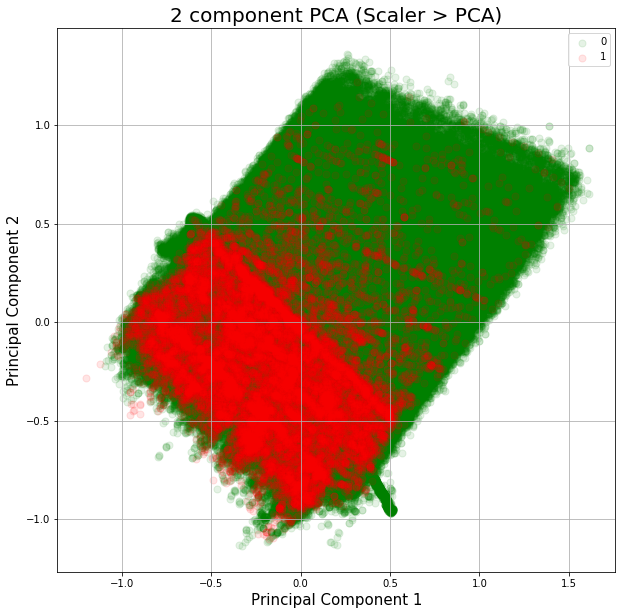

In [52]:
p_comp_df = pd.DataFrame(data = p_components,
             columns = ['pc_1', 'pc_2'])
p_df = pd.concat([p_comp_df, train[['isFraud']].reset_index(drop=True)], axis = 1)

# Plot 2 principal components
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 

targets = [0, 1]
colors = ['g', 'r']
alphas = [.1, .1]
for target, color, alpha in zip(targets, colors, alphas):
    indices = p_df['isFraud'] == target
    ax.scatter(p_df.loc[indices, 'pc_1'], 
               p_df.loc[indices, 'pc_2'],
               c = color, s = 50, alpha=alpha)
ax.legend(targets)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (Scaler > PCA)', fontsize = 20)
ax.grid()

plt.show()

#### PCA 3D

In [11]:
remove_list = ['isFraud']

X = train_numeric.fillna(train_numeric.mean()).drop(remove_list, axis=1)
y = train.isFraud

# Train - test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .5, 
                                                    stratify=y, random_state=42)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=3)
p_components = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.15434552 0.12041129 0.10693391]
[0.15434552 0.27475681 0.38169072]


In [12]:
#https://github.com/matplotlib/jupyter-matplotlib

%matplotlib widget

# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


p_comp_df = pd.DataFrame(data = p_components,
             columns = ['pc_1', 'pc_2', 'pc_3'])
p_df = pd.concat([p_comp_df, train[['isFraud']].reset_index(drop=True)], axis = 1)

In [13]:
fig = plt.figure(figsize = (5,5))
#ax = fig.add_subplot(1,1,1) 
ax = plt.axes(projection='3d')


targets = [0, 1]
colors = ['g', 'r']
alphas = [.05, .6]
for target, color, alpha in zip(targets, colors, alphas):
    indices = p_df['isFraud'] == target
    ax.scatter(p_df.loc[indices, 'pc_1'], 
               p_df.loc[indices, 'pc_2'],
               p_df.loc[indices, 'pc_3'],
               c = color, s = 50, alpha=alpha)
ax.legend(targets)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA (Scaler > PCA)', fontsize = 20)
ax.grid()

# ax.view_init(elev=10., azim=30)

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Transaction Columns 

> TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
TransactionAMT: transaction payment amount in USD

In [8]:
T_cols = similar_cols[0]

In [32]:
T_cols

['TransactionID', 'TransactionDT', 'TransactionAmt']

In [86]:
train[T_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 3 columns):
TransactionID     590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
dtypes: float64(1), int64(2)
memory usage: 18.0 MB


No missing value in these columns as expected.

In [87]:
train[T_cols].describe()

,TransactionID,TransactionDT,TransactionAmt
count,5.905400e+05,5.905400e+05,590540.000000
mean,3.282270e+06,7.372311e+06,135.027176
std,1.704744e+05,4.617224e+06,239.162522
min,2.987000e+06,8.640000e+04,0.251000
25%,3.134635e+06,3.027058e+06,43.321000
50%,3.282270e+06,7.306528e+06,68.769000
75%,3.429904e+06,1.124662e+07,125.000000
max,3.577539e+06,1.581113e+07,31937.391000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a38dc9748>,
      dtype=object)

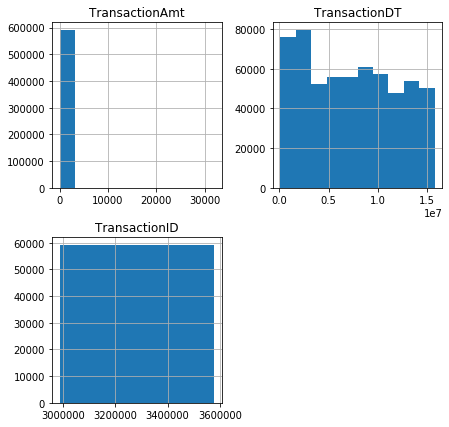

In [16]:
train[T_cols].hist(figsize=(7,7))

### TransactionAmt

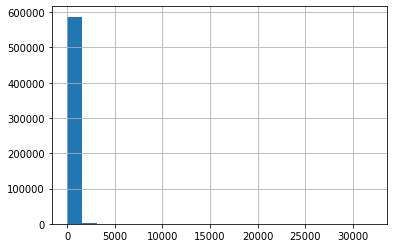

In [12]:
train.TransactionAmt.hist(bins=20)

`TransactionAmt` is highly skewed. Log tranformation helps us better investigate

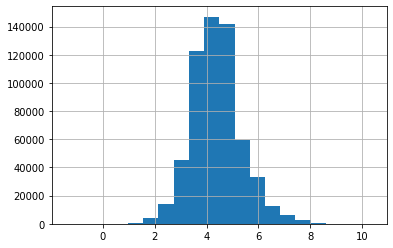

In [11]:
np.log(train.TransactionAmt).hist(bins=20)

In [19]:
# Create a new column with the log of TransactionAmt
train['TransactionAmt_log'] = np.log(train.TransactionAmt)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3789de80>,
      dtype=object)

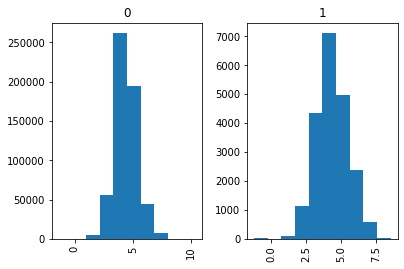

In [28]:
train.hist(column='TransactionAmt_log', by='isFraud')

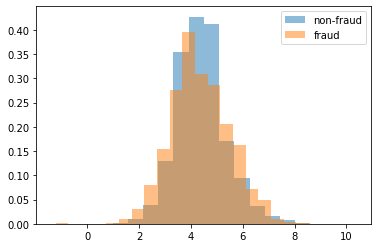

In [29]:
plt.hist(train[train.isFraud==0]['TransactionAmt_log'], bins=20, alpha=0.5, label='non-fraud', density=True)
plt.hist(train[train.isFraud==1]['TransactionAmt_log'], bins=20, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

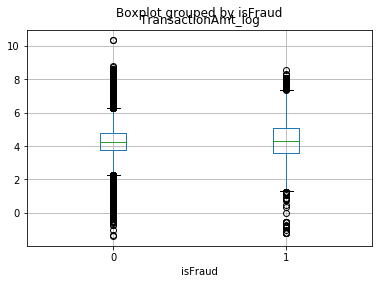

In [30]:
train.boxplot('TransactionAmt_log', by='isFraud')

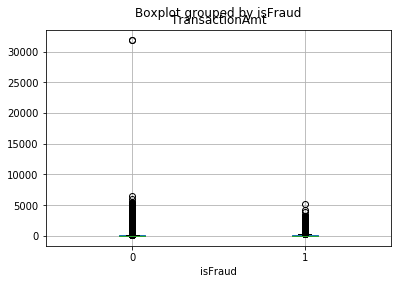

In [31]:
train.boxplot('TransactionAmt', by='isFraud')

Data seems to be normal in terms of transaction amount.

### Transaction ID

> Can be index

In [34]:
train.TransactionID.head()

0    2987000
1    2987001
2    2987002
3    2987003
4    2987004
Name: TransactionID, dtype: int64

In [38]:
train.TransactionID.nunique(), len(train)

(590540, 590540)

### TransactionDT

In [39]:
train.TransactionDT.head()

0    86400
1    86401
2    86469
3    86499
4    86506
Name: TransactionDT, dtype: int64

In [40]:
def make_day_feature(df, offset=0, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    offset : float (default=0)
        offset (in days) to shift the start/end of a day.
    tname : str
        Name of the time column in df.
    """
    # found a good offset is 0.58
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    tname : str
        Name of the time column in df.
    """
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

Text(0, 0.5, 'Number of transactions')

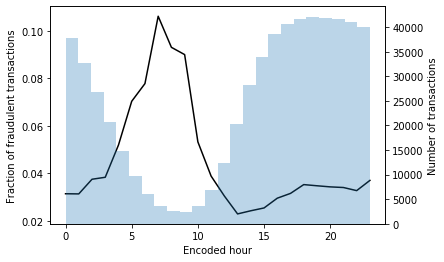

In [43]:
train['Transaction_hours'] = make_hour_feature(train)
plt.plot(train.groupby('Transaction_hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['Transaction_hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

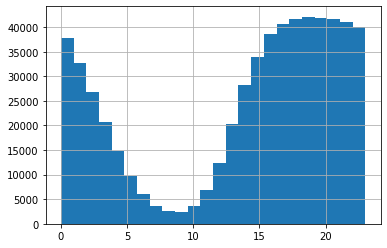

In [82]:
train.Transaction_hours.hist(bins=24)

In [45]:
train.Transaction_hours.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Transaction_hours, dtype: float64

In [46]:
train.Transaction_hours.tail()

590535    23.0
590536    23.0
590537    23.0
590538    23.0
590539    23.0
Name: Transaction_hours, dtype: float64

In [47]:
train.TransactionDT/3600

0           24.000000
1           24.000278
2           24.019167
3           24.027500
4           24.029444
             ...     
590535    4391.957500
590536    4391.958056
590537    4391.966389
590538    4391.968889
590539    4391.980833
Name: TransactionDT, Length: 590540, dtype: float64

In [72]:
import datetime

START_DATE = '2019-03-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')

train['TransactionDT_DT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

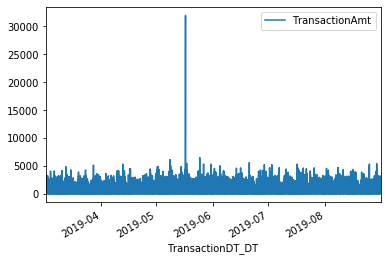

In [73]:
train.plot(x ='TransactionDT_DT', y = 'TransactionAmt')

In [74]:
train.groupby('TransactionDT_DT').TransactionAmt.sum().sort_values(ascending=False)

TransactionDT_DT
2019-05-16 23:52:40    31937.391
2019-05-16 23:53:11    31937.391
2019-06-18 15:53:37     8832.000
2019-05-24 17:23:08     6450.970
2019-05-08 14:15:06     6085.230
                         ...    
2019-04-24 19:09:05        0.292
2019-04-24 19:11:42        0.292
2019-04-24 16:26:38        0.292
2019-06-14 20:50:32        0.272
2019-06-16 22:01:30        0.251
Name: TransactionAmt, Length: 573349, dtype: float64

In [76]:
train[train.TransactionDT_DT=='2019-05-16 23:52:40'].isFraud

274336    0
Name: isFraud, dtype: int64

## Card Columns
> card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
All categorical according to the data description

In [84]:
card_cols = similar_cols[1]
card_cols

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [88]:
train[card_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 6 columns):
card1    590540 non-null int64
card2    581607 non-null float64
card3    588975 non-null float64
card4    588963 non-null object
card5    586281 non-null float64
card6    588969 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 31.5+ MB


There are missing in some of these columns. (Not significant)

In [91]:
# Average missing
train[card_cols].isna().mean()

card1    0.000000
card2    0.015127
card3    0.002650
card4    0.002670
card5    0.007212
card6    0.002660
dtype: float64

In [93]:
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [94]:
train[card_cols].describe(include='all')

,card1,card2,card3,card4,card5,card6
count,590540.000000,581607.000000,588975.000000,588963,586281.000000,588969
unique,NaN,NaN,NaN,4,NaN,4
top,NaN,NaN,NaN,visa,NaN,debit
freq,NaN,NaN,NaN,384767,NaN,439938
mean,9898.734658,362.555488,153.194925,NaN,199.278897,NaN
std,4901.170153,157.793246,11.336444,NaN,41.244453,NaN
min,1000.000000,100.000000,100.000000,NaN,100.000000,NaN
25%,6019.000000,214.000000,150.000000,NaN,166.000000,NaN
50%,9678.000000,361.000000,150.000000,NaN,226.000000,NaN
75%,14184.000000,512.000000,150.000000,NaN,226.000000,NaN


In [95]:
train.card4.value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [97]:
train.groupby('card4').isFraud.mean()

card4
american express    0.028698
discover            0.077282
mastercard          0.034331
visa                0.034756
Name: isFraud, dtype: float64

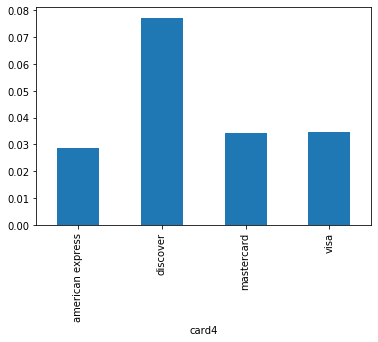

In [116]:
train.groupby('card4').isFraud.mean().plot.bar()

Fraud ratio is relatively higher for "discover". However, the number of discover cards is significantly lower when compared to "visa" and "mastercard". This may or may not be a significant feature.

In [96]:
train.card6.value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [98]:
train.groupby('card6').isFraud.mean()

card6
charge card        0.000000
credit             0.066785
debit              0.024263
debit or credit    0.000000
Name: isFraud, dtype: float64

More fraud is done with credit cards. It is high likely that `card6` is a significant feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d72c860>,
      dtype=object)

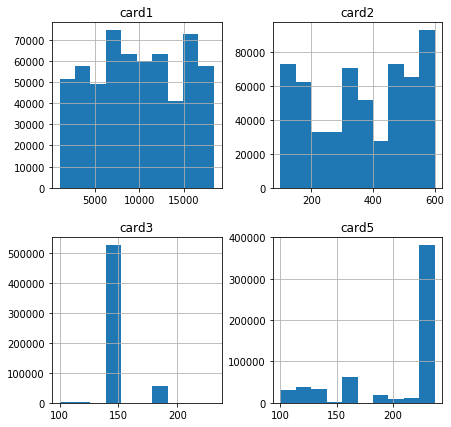

In [100]:
train[card_cols].hist(figsize=(7,7))

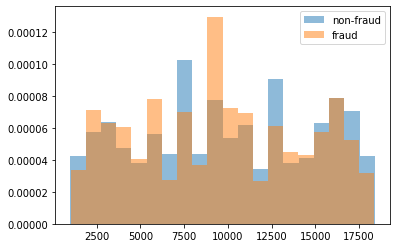

In [104]:
plt.hist(train[train.isFraud==0]['card1'], bins=20, alpha=0.5, label='non-fraud', density=True)
plt.hist(train[train.isFraud==1]['card1'], bins=20, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

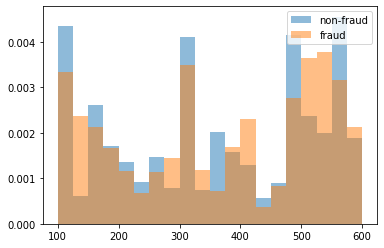

In [105]:
plt.hist(train[train.isFraud==0]['card2'], bins=20, alpha=0.5, label='non-fraud', density=True)
plt.hist(train[train.isFraud==1]['card2'], bins=20, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

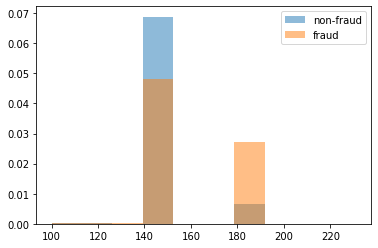

In [111]:
plt.hist(train[train.isFraud==0]['card3'], bins=10, alpha=0.5, label='non-fraud', density=True)
plt.hist(train[train.isFraud==1]['card3'], bins=10, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

In [102]:
train.card3.value_counts()

150.0    521287
185.0     56346
106.0      1571
146.0      1252
144.0      1252
          ...  
228.0         1
139.0         1
114.0         1
164.0         1
221.0         1
Name: card3, Length: 114, dtype: int64

The value `185` for `card3` contains higher ratio of frauds then non-fraunds (after normalization). This may be country code.

In [112]:
train.groupby('card3').isFraud.mean().sort_values(ascending=False).head(20)

card3
206.0    1.000000
160.0    1.000000
125.0    1.000000
181.0    1.000000
132.0    1.000000
224.0    1.000000
175.0    1.000000
139.0    1.000000
208.0    0.500000
191.0    0.388889
155.0    0.333333
223.0    0.254545
167.0    0.250000
118.0    0.235294
129.0    0.222222
157.0    0.200000
198.0    0.193548
182.0    0.179487
231.0    0.166667
127.0    0.142857
Name: isFraud, dtype: float64

In [115]:
train[train.card3==206.0]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionAmt_log,TransactionDT_hours,Transaction_hours,TransactionDT_DT
21910,3008910,1,577623,60.722,C,11795,555.0,206.0,mastercard,137.0,...,F,F,T,T,mobile,Y635-L03 Build/HuaweiY635-L03,4.106306,16.0,16.0,2019-03-07 16:27:03
242957,3229957,1,5769768,41.000,H,7291,555.0,206.0,visa,226.0,...,T,F,T,T,desktop,Windows,3.713572,18.0,18.0,2019-05-06 18:42:48


In [314]:
train[card_cols].corr()

,card1,card2,card3,card5
card1,1.000000,0.004960,0.002965,-0.093633
card2,0.004960,1.000000,0.023816,0.030486
card3,0.002965,0.023816,1.000000,-0.158383
card5,-0.093633,0.030486,-0.158383,1.000000


## Address Columns

> Categorical Features - Transaction

> addr: address 

> both addresses are for purchaser 

> addr1 as billing region 

> addr2 as billing country 

In [118]:
addr_cols = similar_cols[2]
addr_cols

['addr1', 'addr2']

In [119]:
train[addr_cols].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a45118748>,
      dtype=object)

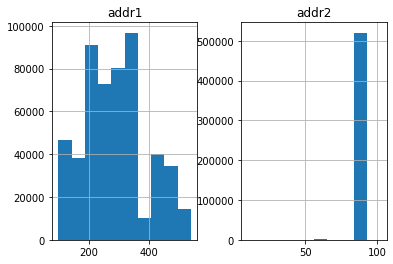

In [120]:
train[addr_cols].hist()

In [122]:
train[addr_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 2 columns):
addr1    524834 non-null float64
addr2    524834 non-null float64
dtypes: float64(2)
memory usage: 13.5 MB


Both have same number of missings. Almost all transactions are from one country (possible the U.S.)

In [125]:
train.addr1.value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
462.0        1
128.0        1
481.0        1
120.0        1
340.0        1
Name: addr1, Length: 332, dtype: int64

In [126]:
train.addr2.value_counts()

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
55.0         1
79.0         1
49.0         1
50.0         1
70.0         1
Name: addr2, Length: 74, dtype: int64

In [127]:
train.groupby('addr1').isFraud.mean().sort_values(ascending=False).head(20)

addr1
305.0    0.666667
483.0    0.565217
466.0    0.500000
471.0    0.500000
501.0    0.500000
391.0    0.457143
431.0    0.342105
260.0    0.333333
432.0    0.289474
216.0    0.240741
479.0    0.230769
296.0    0.212534
399.0    0.200000
161.0    0.194774
239.0    0.193548
453.0    0.190476
171.0    0.166667
536.0    0.161812
426.0    0.156250
356.0    0.133333
Name: isFraud, dtype: float64

In [128]:
train.groupby('addr2').isFraud.mean().sort_values(ascending=False).head(20)

addr2
10.0    1.000000
82.0    1.000000
46.0    1.000000
51.0    1.000000
75.0    1.000000
92.0    1.000000
38.0    0.666667
65.0    0.536585
36.0    0.500000
54.0    0.333333
73.0    0.200000
96.0    0.139498
68.0    0.100000
29.0    0.090909
60.0    0.090467
32.0    0.065934
87.0    0.023972
30.0    0.000000
31.0    0.000000
35.0    0.000000
Name: isFraud, dtype: float64

Only around 10 regions have frauds. No fraud has occured in the rest of the regions.

In [131]:
check_top = train.groupby('addr2').isFraud.mean().sort_values(ascending=False).head(6).index.to_list()

In [136]:
train[train.addr2.isin(check_top)].shape[0]

19

 The one with ratio `1.0` are only a small number of the observations.  

In [138]:
check_zeros = train.groupby('addr2').isFraud.mean().sort_values(ascending=False)[18:].index.to_list()

In [139]:
train[train.addr2.isin(check_zeros)].shape[0]

210

 The one with ratio `0.0` also constitue small number of the observations.  

## Distance Columns

> dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

In [141]:
dist_cols = similar_cols[3]
dist_cols

['dist1', 'dist2']

In [144]:
train[dist_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 2 columns):
dist1    238269 non-null float64
dist2    37627 non-null float64
dtypes: float64(2)
memory usage: 13.5 MB


Both, especially the second feature has high number of missing.

In [143]:
train[dist_cols].head()

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a42868908>,
      dtype=object)

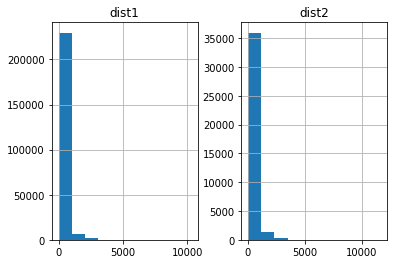

In [145]:
train[dist_cols].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f5607b8>,
      dtype=object)

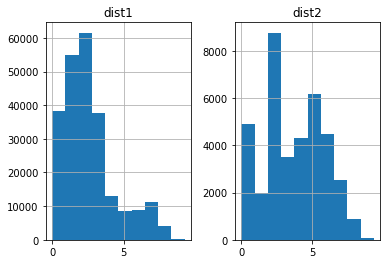

In [160]:
np.log(train[dist_cols]+1).hist()

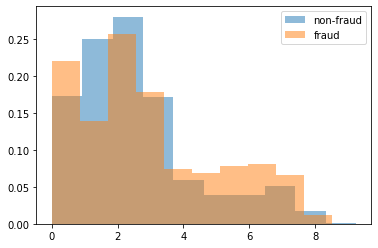

In [162]:
plt.hist(np.log(train[train.isFraud==0]['dist1']+1), bins=10, alpha=0.5, label='non-fraud', density=True)
plt.hist(np.log(train[train.isFraud==1]['dist1']+1), bins=10, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

In [165]:
train.groupby('isFraud').dist1.mean()

isFraud
0    117.360098
1    174.588854
Name: dist1, dtype: float64

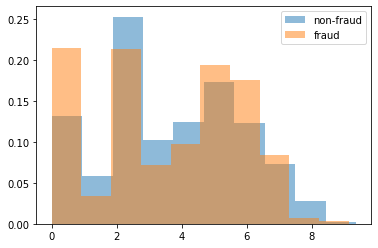

In [164]:
plt.hist(np.log(train[train.isFraud==0]['dist2']+1), bins=10, alpha=0.5, label='non-fraud', density=True)
plt.hist(np.log(train[train.isFraud==1]['dist2']+1), bins=10, alpha=0.5, label='fraud', density=True)
plt.legend(loc='upper right')
plt.show()

In [166]:
train.groupby('isFraud').dist2.mean()

isFraud
0    235.199758
1    201.472259
Name: dist2, dtype: float64

## Email Columns

> P_ and (R_) emaildomain: purchaser and recipient email domain “ certain transactions don't need recipient, so Remaildomain is null.”

In [173]:
email_cols = similar_cols[4]
email_cols

['P_emaildomain', 'R_emaildomain']

In [174]:
train[email_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 2 columns):
P_emaildomain    496084 non-null object
R_emaildomain    137291 non-null object
dtypes: object(2)
memory usage: 13.5+ MB


The latter has high amount of missing

In [176]:
train[email_cols].sample(10)

,P_emaildomain,R_emaildomain
356119,outlook.com,NaN
6795,gmail.com,NaN
330721,gmail.com,NaN
314167,yahoo.com,NaN
109921,NaN,NaN
78983,gmail.com,icloud.com
589965,NaN,NaN
518434,gmail.com,NaN
187001,gmail.com,gmail.com
35226,msn.com,NaN


In [179]:
train.P_emaildomain.value_counts(dropna=False)

gmail.com           228355
yahoo.com           100934
NaN                  94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
windstream.net         305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
n

In [180]:
train.R_emaildomain.value_counts(dropna=False)

NaN                453249
gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
                    ...  
frontiernet.net        14
netzero.com            14
centurylink.net        12
netzero.net             9
sc.rr.com               8
Name: R_emaildomain, Length: 61, dtype: int64

In [316]:
train.groupby('P_emaildomain').isFraud.mean().sort_values(ascending=False)

P_emaildomain
protonmail.com      0.407895
mail.com            0.189624
outlook.es          0.130137
aim.com             0.126984
outlook.com         0.094584
hotmail.es          0.065574
live.com.mx         0.054740
hotmail.com         0.052950
gmail.com           0.043542
yahoo.fr            0.034965
embarqmail.com      0.034615
mac.com             0.032110
icloud.com          0.031434
comcast.net         0.031187
charter.net         0.030637
frontier.com        0.028571
bellsouth.net       0.027763
live.com            0.027622
frontiernet.net     0.025641
anonymous.com       0.023217
suddenlink.net      0.022857
yahoo.com           0.022757
gmail               0.022177
msn.com             0.021994
aol.com             0.021811
earthlink.net       0.021401
ymail.com           0.020868
cox.net             0.020818
cableone.net        0.018868
juno.com            0.018634
me.com              0.017740
optonline.net       0.016815
yahoo.es            0.014925
yahoo.com.mx        0.010369


Wow! There is a significant ratio of Fraud cases with ProtonMail. From the following description, it can be claimed that people who commit Fraud uses encrypted e-mails. However, the number of cases which use this e-mail domai is far less than the others.

> ProtonMail is an end-to-end encrypted email service founded in 2014 at the CERN research facility by Andy Yen, Jason Stockman, and Wei Sun.[4][5] ProtonMail uses client-side encryption to protect email contents and user data before they are sent to ProtonMail servers, unlike other common email providers such as Gmail and Outlook.com. The service can be accessed through a webmail client, the Tor network, or dedicated iOS and Android apps.

In [317]:
sum(train.P_emaildomain == 'protonmail.com')

76

In [336]:
train.groupby('R_emaildomain').isFraud.mean().sort_values(ascending=False)

R_emaildomain
protonmail.com      0.951220
mail.com            0.377049
netzero.net         0.222222
outlook.com         0.165138
outlook.es          0.131640
icloud.com          0.128755
gmail.com           0.119184
hotmail.com         0.077793
earthlink.net       0.075949
hotmail.es          0.068493
live.com.mx         0.058355
yahoo.com           0.051512
live.com            0.049869
rocketmail.com      0.043478
suddenlink.net      0.040000
charter.net         0.039370
ymail.com           0.038647
yahoo.fr            0.036496
yahoo.es            0.035088
aol.com             0.034855
anonymous.com       0.029130
aim.com             0.027778
cox.net             0.023965
me.com              0.019784
comcast.net         0.011589
optonline.net       0.010695
yahoo.com.mx        0.010610
mac.com             0.009174
prodigy.net.mx      0.004831
bellsouth.net       0.004739
sbcglobal.net       0.001812
msn.com             0.001174
frontier.com        0.000000
q.com               0.000000


Similar one here. Another important e-mail domain "mail.com". It seems that it provides more privacy for the users.

> Mail.com is one of the last remaining major email providers who do not ask for a personal phone number to set up an inbox, allowing access to users who do not have or do not wish to provide a phone number to a third party simply to use email. Although this allows for greater privacy, this also means their users do not have the option to secure their email accounts by using two-factor authentication (2FA), which is a form of multi-factor authentication.

In [321]:
sum(train.P_emaildomain == 'mail.com')

559

In [324]:
R_email_dict = train.groupby('R_emaildomain').isFraud.mean().sort_values(ascending=False).to_dict()

In [328]:
train.R_emaildomain

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
590535    NaN
590536    NaN
590537    NaN
590538    NaN
590539    NaN
Name: R_emaildomain, Length: 590540, dtype: object

In [351]:
train.P_emaildomain.fillna('missing')

,P_emaildomain,R_emaildomain
0,missing,missing
1,gmail.com,missing
2,outlook.com,missing
3,yahoo.com,missing
4,gmail.com,missing


In [355]:
train.R_emaildomain.map(R_email_dict).value_counts()

0.043542    228355
0.022757    100934
0.029538     94456
0.052950     45250
0.023217     36998
0.021811     28289
0.031187      7888
0.031434      6267
0.094584      5096
0.021994      4092
0.007439      4033
0.027622      3041
0.004040      2970
0.008133      2705
0.000000      2484
0.020868      2396
0.027763      1909
0.010369      1543
0.017740      1522
0.020818      1393
0.016815      1011
0.030637       816
0.054740       749
0.003012       664
0.189624       559
0.021401       514
0.022177       496
0.130137       438
0.032110       436
0.018634       322
0.126984       315
0.009836       305
0.065574       305
0.028571       280
0.034615       260
0.004831       207
0.005102       196
0.025641       195
0.022857       175
0.006098       164
0.018868       159
0.034965       143
0.014925       134
0.407895        76
Name: R_emaildomain, dtype: int64

In [337]:
aa = train.fillna(-1).groupby('R_emaildomain').isFraud.mean().sort_values(ascending=False)

In [344]:
aa.head(50)

R_emaildomain
protonmail.com      0.951220
mail.com            0.377049
netzero.net         0.222222
outlook.com         0.165138
outlook.es          0.131640
icloud.com          0.128755
gmail.com           0.119184
hotmail.com         0.077793
earthlink.net       0.075949
hotmail.es          0.068493
live.com.mx         0.058355
yahoo.com           0.051512
live.com            0.049869
rocketmail.com      0.043478
suddenlink.net      0.040000
charter.net         0.039370
ymail.com           0.038647
yahoo.fr            0.036496
yahoo.es            0.035088
aol.com             0.034855
anonymous.com       0.029130
aim.com             0.027778
cox.net             0.023965
-1                  0.020819
me.com              0.019784
comcast.net         0.011589
optonline.net       0.010695
yahoo.com.mx        0.010610
mac.com             0.009174
prodigy.net.mx      0.004831
bellsouth.net       0.004739
sbcglobal.net       0.001812
msn.com             0.001174
live.fr             0.000000


In [352]:
train.P_emaildomain.fillna('missing', inplace=True)
train.R_emaildomain = train.P_emaildomain.fillna('missing')

P_email_dict = train.groupby('P_emaildomain').isFraud.mean().to_dict()
R_email_dict = train.groupby('R_emaildomain').isFraud.mean().to_dict()

train['P_emaildomain_val'] = train.P_emaildomain.map(P_email_dict)
train['R_emaildomain_val'] = train.R_emaildomain.map(R_email_dict)

In [353]:
train.P_emaildomain.head()

0        missing
1      gmail.com
2    outlook.com
3      yahoo.com
4      gmail.com
Name: P_emaildomain, dtype: object

In [354]:
train['P_emaildomain_val'].head()

0    0.029538
1    0.043542
2    0.094584
3    0.022757
4    0.043542
Name: P_emaildomain_val, dtype: float64

## ProductCD

> ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

In [181]:
similar_cols[5]

['ProductCD']

In [185]:
train.ProductCD.value_counts(dropna=False)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

No missing values in this column.

In [186]:
train.groupby('ProductCD').isFraud.mean()

ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

Seems to be an important feature.

## C Columns

> C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

>“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.

>Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”

In [189]:
C_cols = similar_cols[6]
print(C_cols)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


In [190]:
train[C_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 14 columns):
C1     590540 non-null float64
C2     590540 non-null float64
C3     590540 non-null float64
C4     590540 non-null float64
C5     590540 non-null float64
C6     590540 non-null float64
C7     590540 non-null float64
C8     590540 non-null float64
C9     590540 non-null float64
C10    590540 non-null float64
C11    590540 non-null float64
C12    590540 non-null float64
C13    590540 non-null float64
C14    590540 non-null float64
dtypes: float64(14)
memory usage: 67.6 MB


Intuitavely no missing info here, since it is basically a count of some attributes.

In [191]:
train[C_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [192]:
train[C_cols].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


C columns seem to be highly skewed and almost all the data is within 0-1 range.

In [285]:
train[C_cols].apply(pd.Series.value_counts).head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0.0,494.0,443.0,588111.0,451883.0,372435.0,49066.0,523142.0,447667.0,183795.0,453442.0,1864.0,489199.0,35460.0,35947.0
1.0,316791.0,316261.0,2137.0,111817.0,122883.0,341552.0,51966.0,104994.0,228938.0,100231.0,389692.0,76661.0,199337.0,320189.0
2.0,105071.0,103948.0,180.0,12994.0,34776.0,86103.0,7314.0,15927.0,77829.0,14938.0,89677.0,12242.0,57616.0,93843.0
3.0,51315.0,51770.0,58.0,4949.0,13189.0,35490.0,2033.0,5493.0,32505.0,6417.0,34463.0,4185.0,33033.0,44471.0
4.0,28845.0,28251.0,7.0,1902.0,6828.0,17805.0,1109.0,2817.0,16196.0,2836.0,16051.0,1716.0,23704.0,25390.0


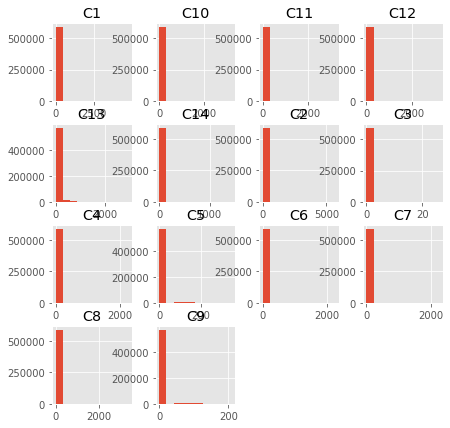

In [232]:
train[C_cols].hist(figsize=(7,7))
plt.show()

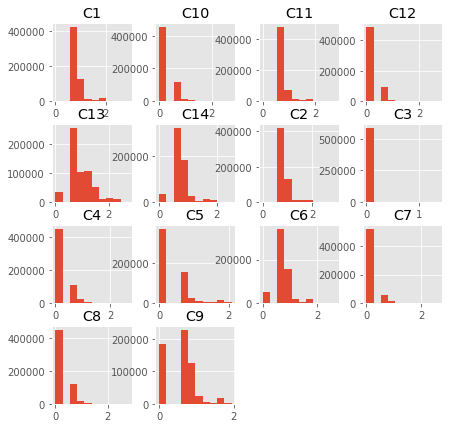

In [243]:
np.log(np.cbrt(train[C_cols])+1).hist(figsize=(7,7))
plt.show()

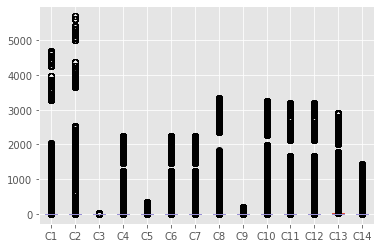

In [279]:
train[C_cols].plot.box()

In [303]:
def detect_replace_outliers(data, columns, thres_low, thres_high):
    '''
    Detects outliers and replace them with NaN in a conservative way to
    prepare data for modeling. Specific threshold or limit for each
    feature can be used for better results. This function needs to be
    revisited for further analyis! 
    '''
    data_new = data[columns].copy()
    Q1 = data_new.quantile(0.25)
    Q3 = data_new.quantile(0.75)
    IQR = Q3 - Q1
    
    limit_low = thres_low * IQR
    limit_high = thres_high * IQR
    
    # Print number of outliers by column
    print("Number of outliers:\n", ((data_new < Q1 - limit_low) | (data_new > Q3 + limit_high)).sum())
    
#     # Print number of rows affected
#     print("\nNumber of rows affected:", 
#           (((data_new < Q1 - limit_low) | (data_new > Q3 + limit_high)).sum(axis=1) > 0 ).sum()
#          ) 
        
    return data_new[(data_new >= Q1 - limit_low) & (data_new <= Q3 + limit_high)]

df_ccols = detect_replace_outliers(train, C_cols, 1.5, 3);


Number of outliers:
 C1      43588
C2      45977
C3       2429
C4     138657
C5      40429
C6      50337
C7      67398
C8     142873
C9      30792
C10    137098
C11     48821
C12    101341
C13     50055
C14     55045
dtype: int64


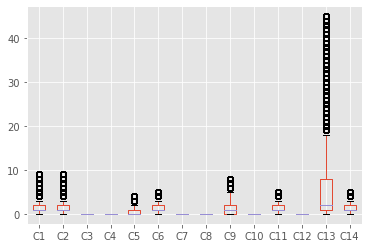

In [304]:
df_ccols.plot.box()

In [207]:
corr = train[C_cols].corr()

(14, 0)

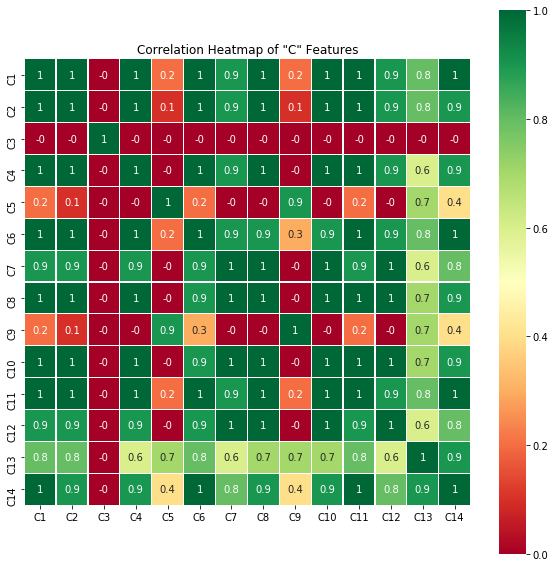

In [215]:
# Add figure size
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "C" Features')
# ax.get_ylim()
# (13.5, 0.5)
ax.set_ylim(14, 0)

Many of `C` featuers are higly correlated with others. C3 on the other hand, is not correlated with any other feature. New feature can be created and used instead of correlated ones.

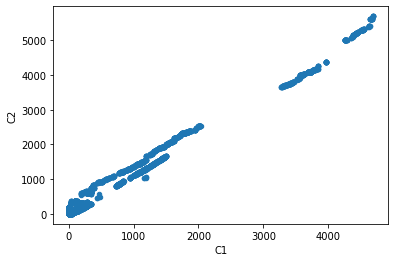

In [216]:
train.plot.scatter(x='C1', y='C2')

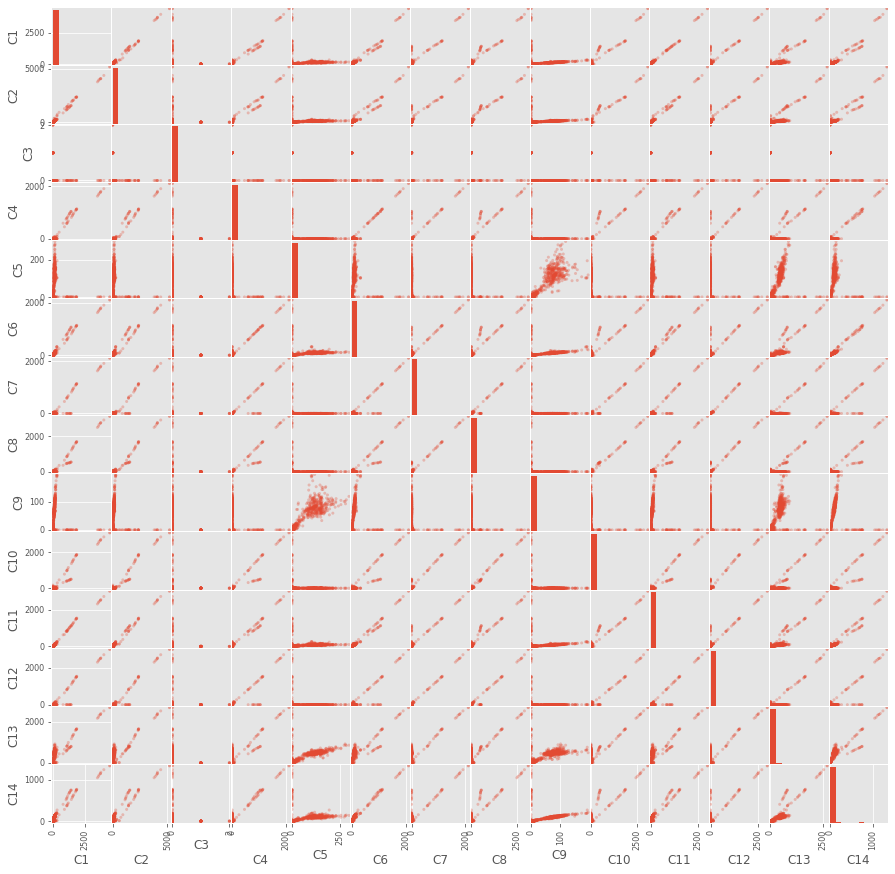

In [223]:
plt.style.use('ggplot')

pd.plotting.scatter_matrix(train[C_cols].sample(10000), alpha=0.3, figsize=(15, 15))

plt.show()

In [225]:
train.groupby('isFraud')[C_cols].mean()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
isFraud,,,,,,,,,,,,,,
0,13.314952,14.173283,0.005840,3.693878,5.722537,8.786377,2.517484,4.560881,4.580904,4.723526,9.747825,3.549703,32.814474,8.220491
1,35.535740,45.509413,0.000242,15.077336,1.406717,16.923148,11.977157,21.242608,1.703964,19.493926,23.857475,18.597541,24.967768,10.356047


In [228]:
train.groupby('isFraud')[C_cols].describe().stack()

C1             C2             C3             C4  \
isFraud                                                                     
0       count  569877.000000  569877.000000  569877.000000  569877.000000   
        mean       13.314952      14.173283       0.005840       3.693878   
        std       127.787969     147.485925       0.153208      65.839255   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         1.000000       1.000000       0.000000       0.000000   
        50%         1.000000       1.000000       0.000000       0.000000   
        75%         3.000000       3.000000       0.000000       0.000000   
        max      4685.000000    5691.000000      26.000000    2253.000000   
1       count   20663.000000   20663.000000   20663.000000   20663.000000   
        mean       35.535740      45.509413       0.000242      15.077336   
        std       242.976260     287.813648       0.015554     125.673738   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         1.000000       1.000000       0.000000       0.000000   
        50%         2.000000       2.000000       0.000000       1.000000   
        75%         6.000000       7.000000       0.000000       2.000000   
        max      4682.000000    5690.000000       1.000000    2251.000000   

                          C5             C6             C7             C8  \
isFraud                                                                     
0       count  569877.000000  569877.000000  569877.000000  569877.000000   
        mean        5.722537       8.786377       2.517484       4.560881   
        std        26.121841      68.689176      58.860773      91.023016   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         0.000000       1.000000       0.000000       0.000000   
        50%         0.000000       1.000000       0.000000       0.000000   
        75%         1.000000       2.000000       0.000000       0.000000   
        max       349.000000    2253.000000    2255.000000    3331.000000   
1       count   20663.000000   20663.000000   20663.000000   20663.000000   
        mean        1.406717      16.923148      11.977157      21.242608   
        std        12.946092     126.298758     115.143177     176.695771   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         0.000000       1.000000       0.000000       0.000000   
        50%         0.000000       1.000000       0.000000       1.000000   
        75%         0.000000       3.000000       1.000000       2.000000   
        max       331.000000    2251.000000    2253.000000    3328.000000   

                          C9            C10            C11            C12  \
isFraud                                                                     
0       count  569877.000000  569877.000000  569877.000000  569877.000000   
        mean        4.580904       4.723526       9.747825       3.549703   
        std        16.889451      91.239098      90.306569      82.601169   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         0.000000       0.000000       1.000000       0.000000   
        50%         1.000000       0.000000       1.000000       0.000000   
        75%         2.000000       0.000000       2.000000       0.000000   
        max       210.000000    3257.000000    3188.000000    3188.000000   
1       count   20663.000000   20663.000000   20663.000000   20663.000000   
        mean        1.703964      19.493926      23.857475      18.597541   
        std         8.453280     176.919186     170.966234     162.082460   
        min         0.000000       0.000000       0.000000       0.000000   
        25%         0.000000       0.000000       1.000000       0.000000   
        50%         0.000000       1.000000       2.000000       0.000000   
        75%         

In [308]:
def corr_thresh(data, thres):
    '''
    Returns the corelation matrix with columns which have higher value than the threshold.
    '''
    # Create a correlation DataFrame
    corr = data.corr()
    
    # Change the self corelation from "1" to "0"
    for i in range(len(corr)):
        corr.iloc[i, i] = 0
    
    # Stack > select > unstack
    c = corr.stack()
    c_stacked = c[c.abs()>thres]
    c_unstacked = c_stacked.unstack(1)
    
    return c_unstacked

corr_new = corr_thresh(train[C_cols], 0.8)
corr_new.stack().sort_values()

C13  C6     0.808531
C6   C13    0.808531
C14  C10    0.853009
C10  C14    0.853009
C6   C12    0.858182
              ...   
C1   C11    0.996515
C8   C10    0.996970
C10  C8     0.996970
C12  C7     0.999489
C7   C12    0.999489
Length: 92, dtype: float64

In [312]:
def corr_drop_list(data, thres):
    '''
    Returns list of columns to drop
    '''
    # Create a correlation DataFrame
    corr = data.corr().abs()
    
    # Select upper triangle of correlation matrix
    corr_upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype('bool'))
    
    # Find columns with correlation greater than the threshold
    drop_cols = [column for column in corr_upper.columns if any(corr_upper[column] > thres)]
    
    return drop_cols

drop_list = corr_drop_list(train[C_cols], thres = .8)

len(drop_list)

print(drop_list)

['C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


## D Columns

> D1-D15: timedelta, such as days between previous transaction, etc.

In [247]:
D_cols = similar_cols[7]
print(D_cols)

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']


In [248]:
train[D_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 15 columns):
D1     589271 non-null float64
D2     309743 non-null float64
D3     327662 non-null float64
D4     421618 non-null float64
D5     280699 non-null float64
D6     73187 non-null float64
D7     38917 non-null float64
D8     74926 non-null float64
D9     74926 non-null float64
D10    514518 non-null float64
D11    311253 non-null float64
D12    64717 non-null float64
D13    61952 non-null float64
D14    62187 non-null float64
D15    501427 non-null float64
dtypes: float64(15)
memory usage: 72.1 MB


In [249]:
train[D_cols].isna().mean()

D1     0.002149
D2     0.475492
D3     0.445149
D4     0.286047
D5     0.524674
D6     0.876068
D7     0.934099
D8     0.873123
D9     0.873123
D10    0.128733
D11    0.472935
D12    0.890410
D13    0.895093
D14    0.894695
D15    0.150901
dtype: float64

High number of missing values

In [357]:
train[D_cols].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
train.groupby('isFraud')[D_cols].mean()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
isFraud,,,,,,,,,,,,,,,
0,96.364705,171.956223,28.845357,142.432339,43.491155,72.629046,46.943007,157.343727,0.565846,126.396130,147.808201,55.345787,19.316574,58.152163,166.633142
1,38.711306,77.774206,11.744880,72.102904,13.687776,45.856439,11.292228,49.309191,0.520000,52.363653,87.314445,44.202553,6.492321,54.464578,78.245805


In [393]:
train[['D1', 'isFraud']].fillna(-1).groupby('D1').isFraud.mean().sort_values(ascending=False)

D1
1.0      0.120454
2.0      0.114107
3.0      0.098634
297.0    0.086614
5.0      0.076723
           ...   
556.0    0.000000
328.0    0.000000
337.0    0.000000
527.0    0.000000
640.0    0.000000
Name: isFraud, Length: 642, dtype: float64

Seems to be significant! Need to find way to fill missing values

In [397]:
train[['D1', 'isFraud']].groupby(pd.cut(train['D1'], bins = 50)).isFraud.mean().sort_values(ascending=False)

D1
(-0.64, 12.8]     0.047533
(12.8, 25.6]      0.040851
(25.6, 38.4]      0.026492
(179.2, 192.0]    0.024687
(153.6, 166.4]    0.024081
(51.2, 64.0]      0.023653
(38.4, 51.2]      0.022709
(115.2, 128.0]    0.022156
(64.0, 76.8]      0.022143
(166.4, 179.2]    0.022141
(140.8, 153.6]    0.021621
(192.0, 204.8]    0.021014
(76.8, 89.6]      0.020639
(128.0, 140.8]    0.020117
(537.6, 550.4]    0.019868
(89.6, 102.4]     0.019331
(524.8, 537.6]    0.016495
(102.4, 115.2]    0.016246
(243.2, 256.0]    0.015219
(422.4, 435.2]    0.014986
(435.2, 448.0]    0.014842
(409.6, 422.4]    0.014615
(217.6, 230.4]    0.014438
(448.0, 460.8]    0.014234
(499.2, 512.0]    0.013690
(396.8, 409.6]    0.013303
(294.4, 307.2]    0.013091
(384.0, 396.8]    0.013090
(268.8, 281.6]    0.012932
(371.2, 384.0]    0.012808
(204.8, 217.6]    0.012433
(345.6, 358.4]    0.012142
(256.0, 268.8]    0.011785
(230.4, 243.2]    0.011518
(473.6, 486.4]    0.011435
(486.4, 499.2]    0.011427
(281.6, 294.4]    0.01106

Clearly more fraud with less timedelta values.

In [398]:
(train[D_cols]<0).sum()

D1      0
D2      0
D3      0
D4     15
D5      0
D6      3
D7      0
D8      0
D9      0
D10     0
D11     7
D12     2
D13     0
D14     3
D15    15
dtype: int64

There are some values less than 0. How can timedelta be 'negative'???

In [387]:
train[D_cols + ['isFraud']][(train[D_cols]<0).any(1)].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,isFraud
2947,0.0,NaN,NaN,-15.0,NaN,NaN,NaN,NaN,NaN,0.0,-15.0,NaN,NaN,NaN,-15.0,0
3034,450.0,450.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,451.0,29.0,NaN,NaN,NaN,-30.0,0
3814,120.0,120.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0,-33.0,NaN,NaN,NaN,363.0,0
4085,0.0,NaN,NaN,NaN,NaN,NaN,NaN,318.875,0.875,0.0,NaN,NaN,NaN,-193.0,NaN,0
4097,0.0,NaN,0.0,NaN,NaN,NaN,NaN,318.875,0.875,0.0,NaN,NaN,NaN,-193.0,NaN,0


In [389]:
train[D_cols + ['isFraud']][(train[D_cols]<0).any(1)].isFraud.sum()

0

All the rows with negative "D" values are non-Fraud.

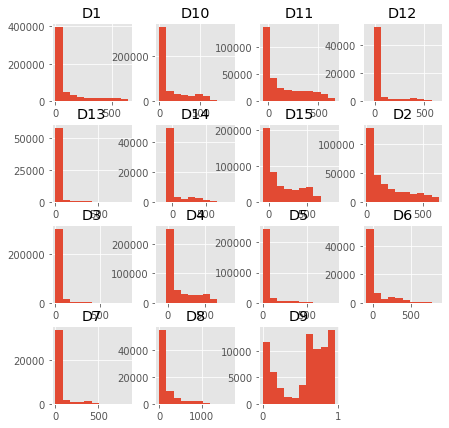

In [364]:
train[D_cols].hist(figsize=(7,7))
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


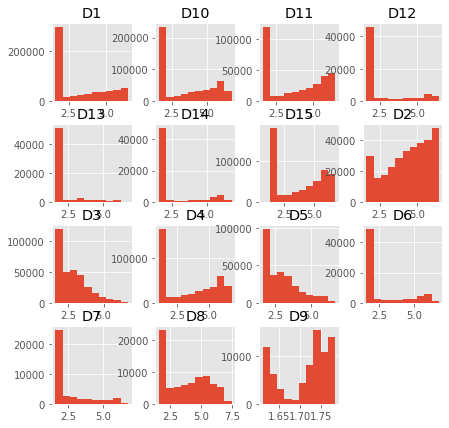

In [368]:
np.log(train[D_cols]+5).hist(figsize=(7,7))
plt.show()

In [358]:
corr = train[D_cols].corr()

(15, 0)

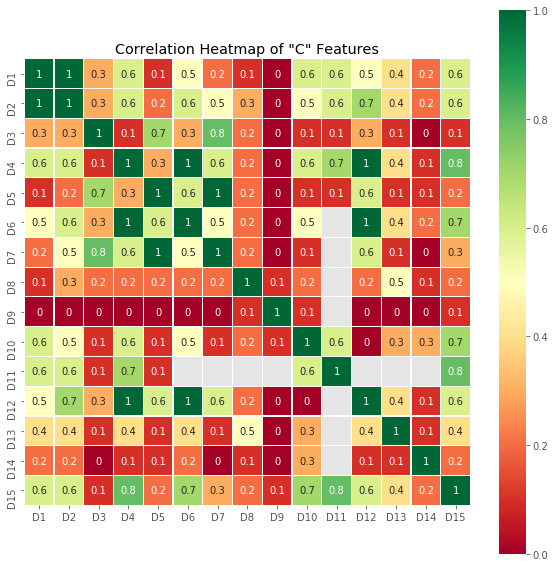

In [360]:
# Add figure size
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "C" Features')
# ax.get_ylim()
ax.set_ylim(15, 0)

In [361]:
def corr_drop_list(data, thres):
    '''
    Returns list of columns to drop
    '''
    # Create a correlation DataFrame
    corr = data.corr().abs()
    
    # Select upper triangle of correlation matrix
    corr_upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype('bool'))
    
    # Find columns with correlation greater than the threshold
    drop_cols = [column for column in corr_upper.columns if any(corr_upper[column] > thres)]
    
    return drop_cols

drop_list = corr_drop_list(train[D_cols], thres = .8)

len(drop_list)

print(drop_list)

['D2', 'D6', 'D7', 'D12']


## M Columns

> M1-M9: match, such as names on card and address, etc.

In [400]:
M_cols = similar_cols[8]
print(M_cols)

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [401]:
train[M_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 9 columns):
M1    319440 non-null object
M2    319440 non-null object
M3    319440 non-null object
M4    309096 non-null object
M5    240058 non-null object
M6    421180 non-null object
M7    244275 non-null object
M8    244288 non-null object
M9    244288 non-null object
dtypes: object(9)
memory usage: 65.1+ MB


In [402]:
train[M_cols].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [403]:
train[M_cols].describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,2,2,2,3,2,2,2,2,2
top,T,T,T,M0,F,F,F,F,T
freq,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [404]:
train[M_cols].apply(pd.Series.value_counts)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
F,25.0,33972.0,67709.0,NaN,132491.0,227856.0,211374.0,155251.0,38632.0
M0,NaN,NaN,NaN,196405.0,NaN,NaN,NaN,NaN,NaN
M1,NaN,NaN,NaN,52826.0,NaN,NaN,NaN,NaN,NaN
M2,NaN,NaN,NaN,59865.0,NaN,NaN,NaN,NaN,NaN
T,319415.0,285468.0,251731.0,NaN,107567.0,193324.0,32901.0,89037.0,205656.0


In [416]:
train[M_cols+['isFraud']].replace(M_dict).head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,isFraud
0,1.0,1.0,1.0,-3.0,0.0,1.0,NaN,NaN,NaN,0
1,NaN,NaN,NaN,-1.0,1.0,1.0,NaN,NaN,NaN,0
2,1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0
3,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [424]:
train[M_cols+['isFraud']].fillna('missing').groupby('M3').isFraud.mean()

M3
F          0.030262
T          0.017054
missing    0.052826
Name: isFraud, dtype: float64

In [405]:
M_dict = {'T':1, 'F':0, 'M0':-1, 'M1':-2, 'M2':-3}

In [426]:
corr = train[M_cols].replace(M_dict).corr()

(9, 0)

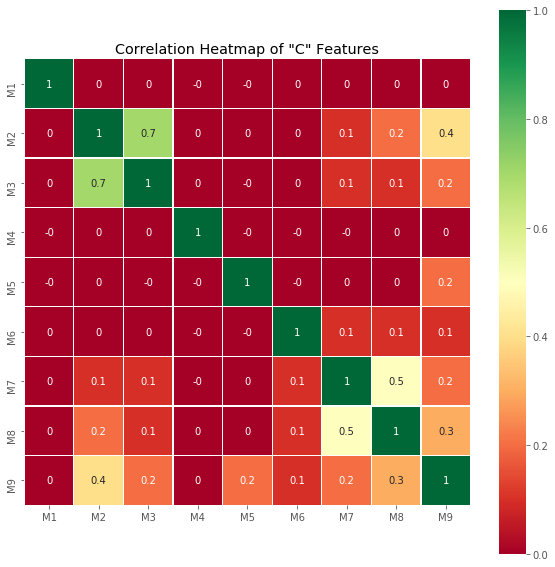

In [429]:
# Add figure size
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "C" Features')
# ax.get_ylim()
ax.set_ylim(9, 0)

## V Columns

> Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

>“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”

>"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

In [267]:
V_cols = similar_cols[9]
print(V_cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V1

In [270]:
train[V_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 339 entries, V1 to V339
dtypes: float64(339)
memory usage: 1.5 GB


In [430]:
train[V_cols].isna().sum()

V1      279287
V2      279287
V3      279287
V4      279287
V5      279287
         ...  
V335    508189
V336    508189
V337    508189
V338    508189
V339    508189
Length: 339, dtype: int64

In [431]:
train[V_cols].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [432]:
corr = train[V_cols].corr()

In [433]:
def corr_drop_list(data, thres):
    '''
    Returns list of columns to drop
    '''
    # Create a correlation DataFrame
    corr = data.corr().abs()
    
    # Select upper triangle of correlation matrix
    corr_upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype('bool'))
    
    # Find columns with correlation greater than the threshold
    drop_cols = [column for column in corr_upper.columns if any(corr_upper[column] > thres)]
    
    return drop_cols

drop_list = corr_drop_list(train[V_cols], thres = .8)

len(drop_list)

print(drop_list)

['V5', 'V9', 'V11', 'V13', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22', 'V24', 'V26', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V36', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V45', 'V48', 'V49', 'V50', 'V51', 'V52', 'V54', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V65', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V76', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97', 'V100', 'V101', 'V102', 'V103', 'V105', 'V106', 'V110', 'V113', 'V116', 'V119', 'V125', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V137', 'V140', 'V142', 'V143', 'V145', 'V147', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V162', 'V163', 'V164', 'V165', 'V167', 'V168', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V185', 'V186', 'V189', 'V190', 'V191', 'V192', 'V193', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V206', 'V207', 'V2

## id Columns

> Identity Table *
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. 
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id12 - id38

In [272]:
id_cols = similar_cols[10]
print(id_cols)

['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


In [273]:
train[id_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 38 columns):
id_01    144233 non-null float64
id_02    140872 non-null float64
id_03    66324 non-null float64
id_04    66324 non-null float64
id_05    136865 non-null float64
id_06    136865 non-null float64
id_07    5155 non-null float64
id_08    5155 non-null float64
id_09    74926 non-null float64
id_10    74926 non-null float64
id_11    140978 non-null float64
id_12    144233 non-null object
id_13    127320 non-null float64
id_14    80044 non-null float64
id_15    140985 non-null object
id_16    129340 non-null object
id_17    139369 non-null float64
id_18    45113 non-null float64
id_19    139318 non-null float64
id_20    139261 non-null float64
id_21    5159 non-null float64
id_22    5169 non-null float64
id_23    5169 non-null object
id_24    4747 non-null float64
id_25    5132 non-null float64
id_26    5163 non-null float64
id_27    5169 non-null object
id_28    140978 non-null ob

In [434]:
train[id_cols].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


In [436]:
train[id_cols].describe()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


## Device Columns

> M1-M9: match, such as names on card and address, etc.

In [276]:
Device_cols = similar_cols[11]
print(Device_cols)

['DeviceType', 'DeviceInfo']


In [277]:
train[Device_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 2 columns):
DeviceType    140810 non-null object
DeviceInfo    118666 non-null object
dtypes: object(2)
memory usage: 13.5+ MB


In [437]:
train[Device_cols].head()

,DeviceType,DeviceInfo
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,mobile,SAMSUNG SM-G892A Build/NRD90M


In [438]:
train[Device_cols].describe()

,DeviceType,DeviceInfo
count,140810,118666
unique,2,1786
top,desktop,Windows
freq,85165,47722


In [446]:
train.DeviceType.value_counts(dropna=False)

NaN        449730
desktop     85165
mobile      55645
Name: DeviceType, dtype: int64

In [445]:
train[['DeviceType', 'isFraud']].fillna('unknown').groupby('DeviceType').isFraud.mean()

DeviceType
desktop    0.065215
mobile     0.101662
unknown    0.021017
Name: isFraud, dtype: float64

In [447]:
train.DeviceInfo.value_counts(dropna=False).sort_values(ascending=False).head(10)

NaN                      471874
Windows                   47722
iOS Device                19782
MacOS                     12573
Trident/7.0                7440
rv:11.0                    1901
rv:57.0                     962
SM-J700M Build/MMB29K       549
SM-G610M Build/MMB29K       461
SM-G531H Build/LMY48B       410
Name: DeviceInfo, dtype: int64

In [463]:
train[['DeviceInfo', 'isFraud']].fillna('unknown').groupby('DeviceInfo').isFraud.agg(['mean', 'count']).\
    sort_values(by='count', ascending=False).head(100)

,mean,count
DeviceInfo,,
unknown,0.025549,471874
Windows,0.065400,47722
iOS Device,0.062683,19782
MacOS,0.022111,12573
Trident/7.0,0.012903,7440
rv:11.0,0.039979,1901
rv:57.0,0.107069,962
SM-J700M Build/MMB29K,0.109290,549
SM-G610M Build/MMB29K,0.080260,461
